In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
import numpy as np

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
str(df["Year_Birth"].dtype)

'int64'

In [4]:
pd.read_csv("df_TFM.csv")

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Salary,Spending_Score,Family_Size
0,Male,Yes,48,1,Entertainment,+20,27836.890725,Average,3.0
1,Male,No,47,1,Entertainment,5-10,44811.832787,Low,3.0
2,Male,Yes,53,1,Artist,+20,17590.920220,Average,3.0
3,Male,Yes,51,1,NaN,+20,NaN,Low,2.0
4,Male,Yes,37,0,Executive,0-5,32451.432985,High,2.0
...,...,...,...,...,...,...,...,...,...
8063,Male,Yes,54,1,Artist,10-20,16577.497536,Average,4.0
8064,Female,Yes,48,0,Lawyer,10-20,55039.789457,High,3.0
8065,Male,Yes,34,0,Artist,5-10,9176.304903,Low,2.0
8066,Female,No,42,1,Engineer,10-20,27418.664933,Low,1.0


# Content Attributes

## People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- Promotion

## Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Preguntas a resolver

1. Distribución de la edad de los individuos (crear variable age, histograma, boxplot y describe)
2. Crear variable que agrupe a los individuos en diferentes grupos de edad
3. Tipos de educación de los individuos y como se relaciona con la edad (countplot normal y countplot en función del grupo de edad.)
4. Tipos de marital status de los clientes (countplot)
5. Distribución del income de los clientes (boxplot histograma y describe)
6. Como se relaciona el income en función de las anteriores variables categóricas (boxplot histograma y describe con todas las variables categóricas anteriores)
7. Distribución del número de niños y de teenagers en la casa del individuo (histograma y describe en función de la variable escogida)
8. Hacer agrupación en DT_Customer por año para ver cuantos clientes se incorporaron en 2013, cuantos en 2014 y cuantos en 2012
9. Recency (pensar en ella como número de días medio entre cada compra del cliente). Ver como se distribuye. Ver como se distribuye en función del marital status. Ver como se distribuye en función de la educación. Ver como se distribuye en función del income
10. Los montos de gasto. Hacer distribución dinámica entre todos. Ver como se distribuye cada uno de ellos en función del income; marital status; age_group; Education

In [100]:
import numpy as np
import pandas as pd

df_tfm = pd.DataFrame()

# Definir el número de muestras
num_samples = 5000

# Generar la edad (entre 18 y 70 años)
df_tfm["edad"] = np.random.randint(24, 65, num_samples)

# Generar sexo
df_tfm["sexo"] = np.random.choice(["hombre", "mujer"], num_samples, p=[0.6, 0.4], )

# Nivel educativo 
def generar_educacion(row):
    edad, sexo = row["edad"], row["sexo"]
    if sexo=="hombre":
        if 21<edad<=30:
            return np.random.choice(["basico", "universitario", "doctor"], p=[0.3, 0.5, 0.2])
        elif 30<edad<=50:
            return np.random.choice(["basico", "universitario", "doctor"], p=[0.2, 0.5, 0.3])
        else:
            return np.random.choice(["basico", "universitario", "doctor"], p=[0.4, 0.5, 0.1])
    else:
        if 21<edad<=30:
            return np.random.choice(["basico", "universitario", "doctor"], p=[0.2, 0.6, 0.2])
        elif 30<edad<=50:
            return np.random.choice(["basico", "universitario", "doctor"], p=[0.2, 0.5, 0.3])
        else:
            return np.random.choice(["basico", "universitario", "doctor"], p=[0.5, 0.4, 0.1])
df_tfm["educacion"] = df_tfm.apply(generar_educacion, axis=1)

def generar_estado_civil(row):
    edad, educacion = row["edad"], row["educacion"]
    if educacion == "basico":
        if edad <= 24:
            return np.random.choice(["en pareja", "solo"], p=[0.4, 0.6])
        elif 24<edad<=30:
            return np.random.choice(["en pareja", "solo", "casado"], p=[0.5, 0.4, 0.1])
        elif 30<edad<=40:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.2, 0.3, 0.3, 0.2])
        elif 40<edad<=55:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.1, 0.2, 0.3, 0.4])
        else:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.2, 0.1, 0.6, 0.1])
    elif educacion == "universitario":
        if edad <= 24:
            return np.random.choice(["en pareja", "solo"], p=[0.4, 0.6])
        elif 24<edad<=30:
            return np.random.choice(["en pareja", "solo", "casado"], p=[0.4, 0.5, 0.1])
        elif 30<edad<=40:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.3, 0.3, 0.2, 0.2])
        elif 40<edad<=55:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.1, 0.2, 0.3, 0.4])
        else:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.3, 0.1, 0.4, 0.2])
    elif educacion == "doctor":
        if edad <= 24:
            return np.random.choice(["en pareja", "solo"], p=[0.4, 0.6])
        elif 24<edad<=30:
            return np.random.choice(["en pareja", "solo", "casado"], p=[0.4, 0.55, 0.05])
        elif 30<edad<=40:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.4, 0.4, 0.1, 0.1])
        elif 40<edad<=55:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.1, 0.3, 0.4, 0.2])
        else:
            return np.random.choice(["en pareja", "solo", "casado", "divorciado"], p=[0.2, 0.2, 0.5, 0.1])
        
df_tfm["estado_civil"] = df_tfm.apply(generar_estado_civil, axis=1)

def generar_hijos(row):
    edad, estado_civil = row["edad"], row["estado_civil"]
    if estado_civil == "solo":
        if edad<=30:
            return 0 
        else:
            return np.random.choice([0, 1, 2], p=[0.5, 0.3, 0.2])
    elif estado_civil == "en pareja":
        if edad<=21:
            return 0
        elif 21<edad<=27:
            return np.random.choice([0, 1, 2], p=[0.4, 0.4, 0.2])
        elif 27<edad<=50:
            return np.random.choice([0, 1, 2, 3], p=[0.2, 0.35, 0.35, 0.1])
        else:
            return np.random.choice([0, 1, 2, 3, 4], p=[0.1, 0.35, 0.3, 0.15, 0.1])
    else:
        if edad<=21:
            return 0
        elif 21<edad<=27:
            return np.random.choice([0, 1, 2], p=[0.4, 0.35, 0.25])
        elif 27<edad<=50:
            return np.random.choice([0, 1, 2, 3], p=[0.2, 0.3, 0.4, 0.1])
        else:
            return np.random.choice([0, 1, 2, 3, 4], p=[0.1, 0.35, 0.3, 0.1, 0.15])
      
df_tfm["num_hijos"] = df_tfm.apply(generar_hijos, axis=1)
d = pd.get_dummies(df_tfm)

df_tfm["salario"] = (2000 + 1000*d["edad"] - 7*d["edad"]**2 + 600*d["num_hijos"] - 10*d["num_hijos"]**2
                     +5000*d["sexo_hombre"] + 4000*d["sexo_mujer"] - 2000*d["educacion_basico"] + 5000*d["educacion_universitario"]+
                     5100*d["educacion_doctor"] + 1000*d["estado_civil_casado"] + 1000*d["estado_civil_divorciado"]
                     + 3000*d["estado_civil_solo"] + 2500*d["estado_civil_en pareja"] + np.random.normal(0, 6000, len(df_tfm)))


df_tfm["salario"] = df_tfm["salario"].astype(int).apply(lambda x: 0 if x<0 else x)

def generar_zona(row):
    salario = row["salario"]
    if salario <= 20000:
        return np.random.choice(["tienda 1", "tienda 2", "tienda 3", "tienda 4"], p=[0.35, 0.35, 0.15, 0.15])
    elif 20000<salario<=30000:
        return np.random.choice(["tienda 1", "tienda 2", "tienda 3", "tienda 4"], p=[0.3, 0.3, 0.2, 0.2])
    elif 30000<salario<=40000:
        return np.random.choice(["tienda 1", "tienda 2", "tienda 3", "tienda 4"], p=[0.25, 0.25, 0.3, 0.2])
    elif 40000<salario<=50000:
        return np.random.choice(["tienda 1", "tienda 2", "tienda 3", "tienda 4"], p=[0.15, 0.15, 0.4, 0.3])
    else:
        return np.random.choice(["tienda 1", "tienda 2", "tienda 3", "tienda 4"], p=[0.1, 0.1, 0.4, 0.4])
df_tfm["tienda_mas_cercana"] = df_tfm.apply(generar_zona, axis=1)

def generar_num_compras_web(row):
    edad, educacion, salario, num_hijos = row["edad"], row["educacion"], row["salario"], row["num_hijos"]
    base_web = 20  # Base para las compras web
    
    # Ajustes basados en edad
    if edad <= 30:
        base_web += 15
    elif 30 < edad <= 50:
        base_web += 7
    else:
        base_web -= 10
    
    # Ajustes basados en nivel educativo
    if educacion == "universitario":
        base_web += 5
    elif educacion == "doctor":
        base_web += 7
    else:
        base_web -= 5
    
    # Ajustes basados en salario
    base_web += salario // 10000  # Dividir el salario por 10000 para reducir el impacto
    
    # Ajustes basados en número de hijos
    base_web -= num_hijos * 2
    
    # Añadir una componente aleatoria
    num_compras_web = base_web + np.random.normal(0, 5)
    return max(0, int(num_compras_web))  # Asegurarse de que no sea negativo

def generar_num_compras_tienda(row):
    edad, educacion, salario, num_hijos, tienda = row["edad"], row["educacion"], row["salario"], row["num_hijos"], row["tienda_mas_cercana"]
    base_tienda = 20  # Base para las compras en tienda
    
    # Ajustes basados en edad
    if edad > 50:
        base_tienda += 10
    elif 30 < edad <= 50:
        base_tienda += 5
    
    # Ajustes basados en nivel educativo
    if educacion == "basico":
        base_tienda += 5
    
    # Ajustes basados en salario
    base_tienda += salario // 15000  # Dividir el salario por 15000 para reducir el impacto
    
    # Ajustes basados en número de hijos
    base_tienda += num_hijos * 3
    
    # Ajustes basados en la tienda más cercana
    if tienda == "tienda 3" or tienda == "tienda 4":
        base_tienda += 5
    
    # Añadir una componente aleatoria
    num_compras_tienda = base_tienda + np.random.normal(0, 5)
    return max(0, int(num_compras_tienda))  # Asegurarse de que no sea negativo

# Aplicar las funciones al DataFrame
df_tfm["num_compras_web"] = df_tfm.apply(generar_num_compras_web, axis=1)
df_tfm["num_compras_tienda"] = df_tfm.apply(generar_num_compras_tienda, axis=1)

# Mostrar el DataFrame
df_tfm.head()

df_tfm

,edad,sexo,educacion,estado_civil,num_hijos,salario,tienda_mas_cercana,num_compras_web,num_compras_tienda
0,50,hombre,universitario,solo,0,47782,tienda 1,38,32
1,45,mujer,universitario,divorciado,2,44916,tienda 4,17,33
2,54,mujer,doctor,casado,3,52974,tienda 2,25,40
3,61,hombre,basico,casado,2,37451,tienda 3,19,43
4,40,hombre,universitario,en pareja,2,42653,tienda 3,30,36
...,...,...,...,...,...,...,...,...,...
4995,38,hombre,universitario,solo,0,47144,tienda 3,21,36
4996,54,hombre,basico,casado,2,35228,tienda 1,18,41
4997,24,mujer,doctor,solo,0,34705,tienda 3,49,26
4998,56,hombre,doctor,solo,0,42199,tienda 3,36,38


In [99]:
df_tfm["tienda_mas_cercana"].value_counts()

tienda_mas_cercana
tienda 3    1702
tienda 4    1388
tienda 2     989
tienda 1     921
Name: count, dtype: int64

In [90]:
df_tfm["salario"].describe()

count     5000.000000
mean     41630.796600
std       7877.033119
min      14786.000000
25%      36258.500000
50%      41931.000000
75%      46991.250000
max      69912.000000
Name: salario, dtype: float64

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
X = pd.get_dummies(df_tfm.drop("salario", axis="columns"))
y = df_tfm["salario"]
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X, y)
y_pred = rf.predict(X)
mean_absolute_percentage_error(y_pred=y_pred, y_true=y)

0.09301971105312865

In [5]:
from datetime import datetime
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df["Age"] = df["Year_Birth"].apply(lambda x : datetime.now().year - x)
df = df.dropna()
df = df.drop("ID", axis="columns")
df = df[df["Marital_Status"].isin(["YOLO", "Absurd"])==False]
df["Marital_Status"] = df["Marital_Status"].apply(lambda x: "Single" if x=="Alone" else x)
df["Year_Customer_Entered"] = df["Dt_Customer"].apply(lambda x: str(x).split("-")[2])
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(2212, 30)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Year_Customer_Entered
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,3,11,1,67,2012
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,3,11,0,70,2014
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,3,11,0,59,2013
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,3,11,0,40,2014
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,3,11,0,43,2014


In [6]:
df["NumStorePurchases"].describe()

count    2212.000000
mean        5.800181
std         3.253616
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

In [7]:
x_columns = ["Age", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome",
             "Year_Customer_Entered", "Recency", "Complain"]
X = df[x_columns]
y = df["MntFruits"]
X

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Year_Customer_Entered,Recency,Complain
0,67,Graduation,Single,58138.0,0,0,2012,58,0
1,70,Graduation,Single,46344.0,1,1,2014,38,0
2,59,Graduation,Together,71613.0,0,0,2013,26,0
3,40,Graduation,Together,26646.0,1,0,2014,26,0
4,43,PhD,Married,58293.0,1,0,2014,94,0
...,...,...,...,...,...,...,...,...,...
2207,57,Graduation,Married,61223.0,0,1,2013,46,0
2208,78,PhD,Together,64014.0,2,1,2014,56,0
2209,43,Graduation,Divorced,56981.0,0,0,2014,91,0
2210,68,Master,Together,69245.0,0,1,2014,8,0


In [8]:
X["Complain"].value_counts()

Complain
0    2191
1      21
Name: count, dtype: int64

In [9]:
X["Income"].describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [10]:
df["Recency"].describe()

count    2212.000000
mean       49.050633
std        28.940794
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [13]:
import pandas as pd
import numpy as np

CARNE Y PESCADO COEFICIENTES SIMILARES

In [14]:
X = pd.get_dummies(X)
y_meat = (0.05*X["Age"] + (-0.001)*X["Age"]**2 + 5*X["Kidhome"] + 10*X["Teenhome"] + 0.5*X["Recency"] - 0.003*X["Recency"]**2 + 0.0004*X["Income"]+ (-0.0000000003)*X["Income"]**2+
              (-30)*X["Complain"] + 5*X["Education_Basic"] + 20*X["Education_Graduation"] + 25*X["Education_Master"] + 30*X["Education_PhD"]+
            +30*X["Marital_Status_Married"]+20*X["Marital_Status_Single"]+30*X["Marital_Status_Together"]+20*X["Marital_Status_Widow"]+np.random.normal(7, 5, len(X)))
y_meat = y_meat.apply(lambda x: 1 if x<=0 else round(x, 2))  
y_meat.describe()

count    2212.000000
mean       93.360954
std        18.566453
min        16.040000
25%        81.787500
50%        95.145000
75%       106.352500
max       206.720000
dtype: float64

In [60]:
X = pd.get_dummies(X)
y_fish = (0.05*X["Age"] + (-0.0005)*X["Age"]**2 + 8*X["Kidhome"] + 4*X["Teenhome"] + 0.4*X["Recency"] - 0.002*X["Recency"]**2 + 0.0003*X["Income"]+ (-0.0000000001)*X["Income"]**2+ (-25)*X["Complain"] + 4*X["Education_Basic"] + 12*X["Education_Graduation"] + 
15*X["Education_Master"] + 25*X["Education_PhD"]+25*X["Marital_Status_Married"]+10*X["Marital_Status_Single"]25*X["Marital_Status_Together"]+15*X["Marital_Status_Widow"]+np.random.normal(7, 5, len(X)))
y_fish = y_fish.apply(lambda x: 1 if x<=0 else round(x, 2)) 
y_fish.describe()

count    2212.000000
mean       74.894724
std        16.044989
min        13.400000
25%        64.547500
50%        75.480000
75%        86.152500
max       222.050000
dtype: float64

VINO, BIEN MÁS CONSUMIDO Y GRAN PESO EN LA EDAD

In [17]:
X = pd.get_dummies(X)
y_wine = (0.1*X["Age"] + (-0.002)*X["Age"]**2 + 5*X["Kidhome"] + 10*X["Teenhome"] + 0.5*X["Recency"] - 0.003*X["Recency"]**2 + 0.0009*X["Income"]+ (-0.0000000003)*X["Income"]**2+
              (-30)*X["Complain"] + 30*X["Education_Basic"] + 30*X["Education_Graduation"] + 30*X["Education_Master"] + 30*X["Education_PhD"]+
            +25*X["Marital_Status_Married"]+35*X["Marital_Status_Single"]+20*X["Marital_Status_Together"]+30*X["Marital_Status_Widow"]+np.random.normal(7, 5, len(X)))
y_wine = y_wine.apply(lambda x: 1 if x<=0 else round(x, 2))  
y_wine.describe()

count    2212.000000
mean      124.572211
std        26.141269
min        15.660000
25%       108.650000
50%       125.670000
75%       141.905000
max       547.810000
dtype: float64

DULCES, PESO EN NIÑOS Y ESTADO CIVIL

In [63]:
y_sweet = (0.025*X["Age"] + (-0.0007)*X["Age"]**2 + 12*X["Kidhome"] + 10*X["Teenhome"] + 
           0.25*X["Recency"] - 0.0015*X["Recency"]**2 + 0.0002*X["Income"]+  
           (-0.00000000015)*X["Income"]**2+ (-15)*X["Complain"] + 
           2*X["Education_Basic"] + 8*X["Education_Graduation"] +  
           10*X["Education_Master"] + 20*X["Education_PhD"]+ 
           10*X["Marital_Status_Married"]+3*X["Marital_Status_Single"]+
           10*X["Marital_Status_Together"]+2*X["Marital_Status_Widow"]+
           np.random.normal(3, 2, len(X))) 
y_sweet.describe()

count    2212.000000
mean       46.942017
std        11.767861
min         3.848127
25%        38.915733
50%        46.643838
75%        54.560384
max       104.010814
dtype: float64

<Axes: xlabel='Income', ylabel='None'>

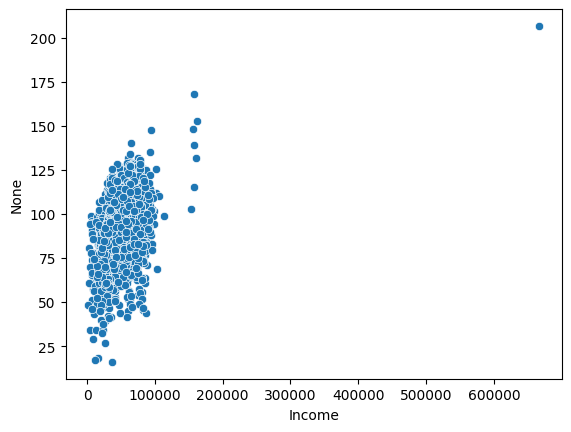

In [23]:
import seaborn as sns
sns.scatterplot(x=X["Income"], y=y_meat)

In [37]:
import numpy as np
X = pd.get_dummies(X)
y_invented = (0.02*X["Age"] + (-0.001)*X["Age"]**2 + 2*X["Kidhome"] + 4*X["Teenhome"] + 0.1*X["Recency"] - 0.001*X["Recency"]**2 + 0.0001*X["Income"]+ (-0.0000000001)*X["Income"]**2+
              (-20)*X["Complain"] + 5*X["Education_Basic"] + 15*X["Education_Graduation"] + 17*X["Education_Master"] + 18*X["Education_PhD"]+
            +20*X["Marital_Status_Married"]+10*X["Marital_Status_Single"]+20*X["Marital_Status_Together"]+10*X["Marital_Status_Widow"]+np.random.normal(5, 5, len(X)))
y_invented = y_invented.apply(lambda x: 1 if x<=0 else x)       
y_invented.astype(int).describe()

count    2212.000000
mean       41.599458
std        10.477887
min         0.000000
25%        35.000000
50%        43.000000
75%        49.000000
max        70.000000
dtype: float64

<Axes: xlabel='Income', ylabel='None'>

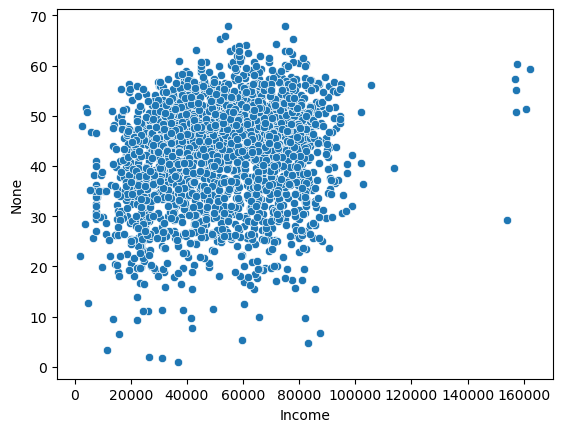

In [67]:
sns.scatterplot(x=X["Income"][X["Income"]!=X["Income"].max()], y=y_invented[y_invented!=y_invented.max()])

In [38]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

oh = OneHotEncoder(handle_unknown="ignore")
X_train, X_test, y_train, y_test = train_test_split(X, y_invented, train_size=0.8, random_state=42)
rf = LinearRegression()
rf.fit(X_train, y_train)

LinearRegression()

In [42]:
def mape(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return ((y_true - y_pred).abs() / y_true+1).mean()

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score
y_train_pred = rf.predict(X_train)
mean_absolute_error(y_true=y_train, y_pred=y_train_pred), r2_score(y_true=y_train, y_pred=y_train_pred)

(4.06465168478738, 0.7628869710845245)

In [44]:
from sklearn.metrics import mean_absolute_percentage_error
y_test_pred = rf.predict(X_test)
mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred), r2_score(y_true=y_test, y_pred=y_test_pred)

(0.12881270521421198, 0.7586711080496801)

In [45]:
y_invented.describe()

count    2212.000000
mean       42.095193
std        10.472084
min         0.982215
25%        35.724943
50%        43.685070
75%        49.806131
max        70.421323
dtype: float64

<Axes: xlabel='None', ylabel='None'>

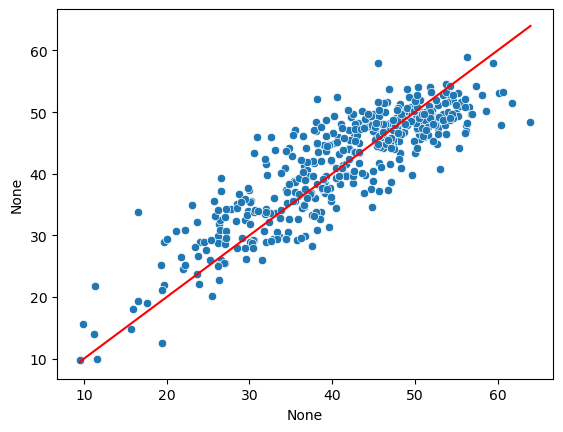

In [71]:
sns.scatterplot(x=y_test, y=y_test_pred)

sns.lineplot(x=y_test, y=y_test, c="r")

In [52]:
df['y_invented'].describe()

count    2212.000000
mean       42.095193
std        10.472084
min         0.982215
25%        35.724943
50%        43.685070
75%        49.806131
max        70.421323
Name: y_invented, dtype: float64

In [53]:
df['MntMeatProducts'].describe()

count    2212.000000
mean      166.970163
std       224.344950
min         0.000000
25%        16.000000
50%        68.000000
75%       232.250000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [64]:
df['y_invented'] = y_invented
df['y_meat'] = y_meat
df['y_fish'] = y_fish
df['y_wine'] = y_wine
df['y_sweet'] = y_sweet
import matplotlib.pyplot as plt
variables = ['y_invented', 'y_meat', 'y_fish', 'y_wine', 'y_sweet']



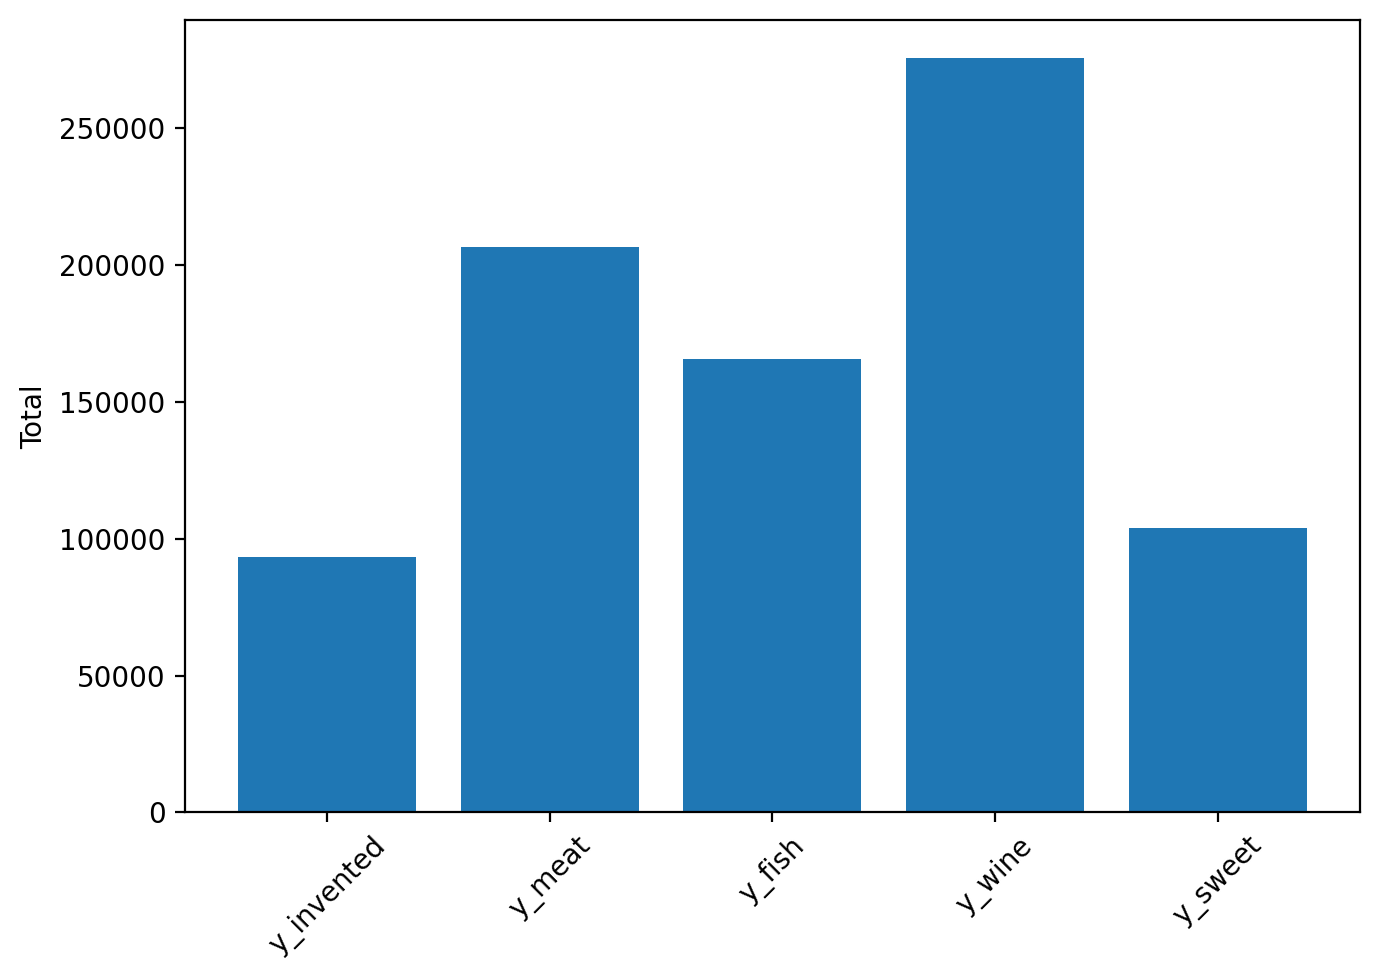

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

def mostrar_acumulado(df: pd.DataFrame, variables: list, ax):
    suma_gastos = df[variables].sum()
    ax.bar(suma_gastos.index, suma_gastos)
    ax.set_ylabel('Total')
    ax.tick_params(axis='x', rotation=45)

variables = ['y_invented', 'y_meat', 'y_fish', 'y_wine', 'y_sweet']

fig, ax = plt.subplots(figsize=(7, 5), dpi=200)
mostrar_acumulado(df, variables, ax)
fig.tight_layout()
plt.show()
    

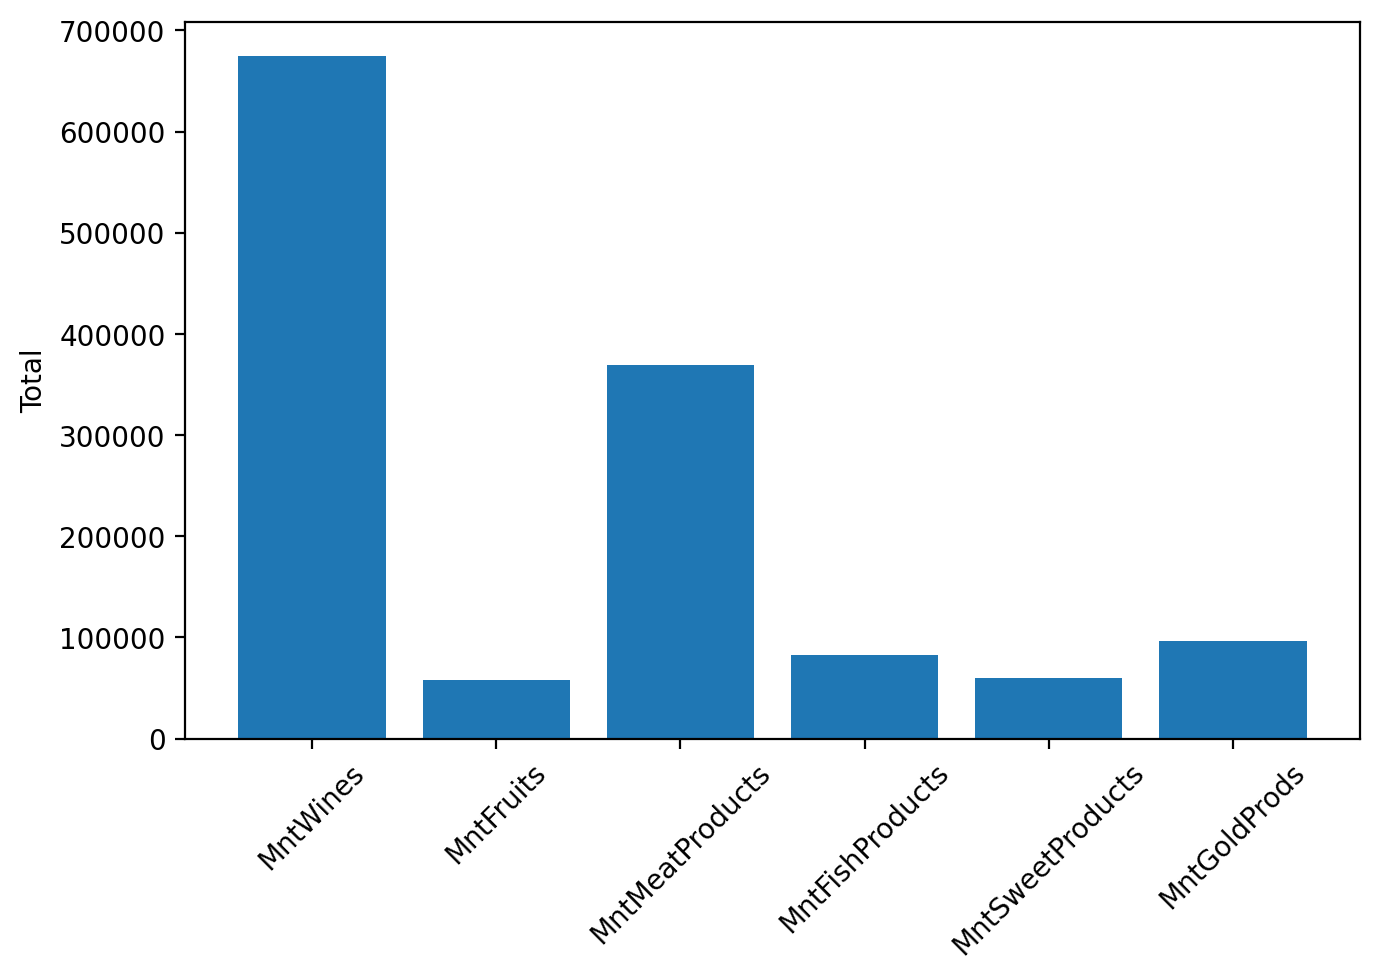

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

def mostrar_acumulado(df: pd.DataFrame, variables: list, ax):
    suma_gastos = df[variables].sum()
    ax.bar(suma_gastos.index, suma_gastos)
    ax.set_ylabel('Total')
    ax.tick_params(axis='x', rotation=45)

productos = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, ax = plt.subplots(figsize=(7, 5), dpi=200)
mostrar_acumulado(df, productos, ax)
fig.tight_layout()
plt.show()
    

In [11]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43


In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

In [30]:
def category_age(age):
    if age <= 18:
        return '0-18'
    elif age <= 30:
        return '19-30'
    elif age <= 50:
        return '31-50'
    elif age <= 70:
        return '51-70'
    else:
        return '71+'

df["Age_Group"] = df["Age"].apply(category_age)

<Axes: ylabel='Age'>

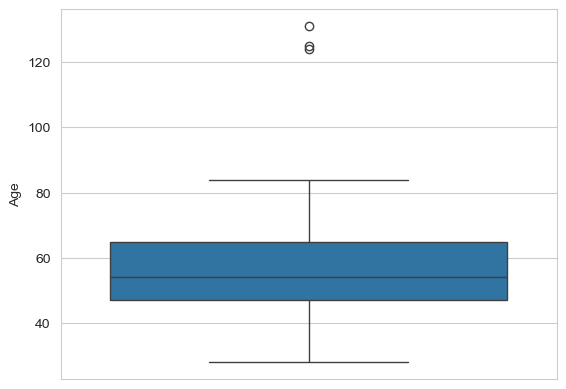

In [31]:
sns.boxplot(df["Age"])

In [32]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

<Axes: ylabel='Income'>

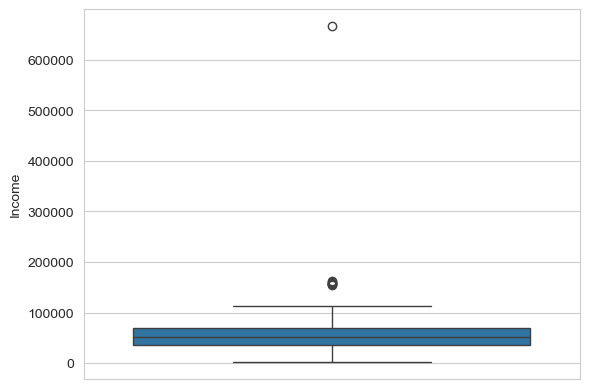

In [33]:
sns.boxplot(df["Income"])

In [34]:
df = df[df["Income"]<100000].reset_index(drop=True)

<Axes: xlabel='Income', ylabel='MntFruits'>

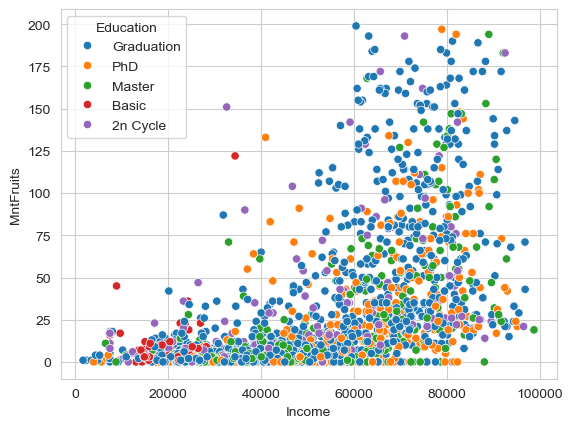

In [35]:
sns.scatterplot(x=df["Income"], y=df["MntFruits"], hue=df["Education"])

In [36]:
df["Marital_Status"].value_counts()

Marital_Status
Married     854
Together    567
Single      469
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Text(0.5, 1.0, 'Elbow curve')

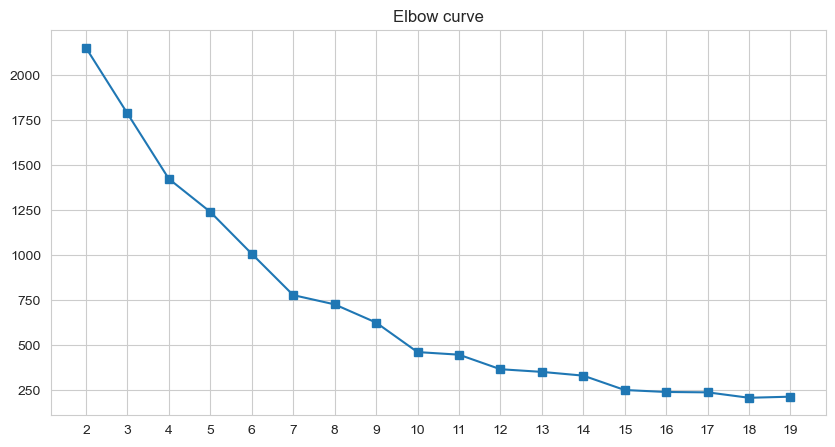

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
df_k = df[["Age_Group", "Income", "Recency", "Education"]].copy()
min_max = MinMaxScaler()
X = min_max.fit_transform(pd.get_dummies(df_k))
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2,20), distorsions, marker="s")
plt.xticks(range(2, 20))
plt.grid(True)
plt.title('Elbow curve')

parece que 6 clusters es una buena idea

In [95]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)
clusters = kmeans.predict(X)
df_k["clusters"] = clusters

In [97]:
pd.DataFrame(df_k.groupby("clusters")["Education"].value_counts())

count
clusters Education        
0        Graduation    557
         PhD           256
         Master        195
         2n Cycle       80
         Basic          14
1        PhD           216
         Master        168
         2n Cycle      118
         Basic          40
2        Graduation    552

In [79]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
pca.fit(pd.get_dummies(df_k.drop("clusters", axis="columns")))
componentes = pca.transform(pd.get_dummies(df_k.drop("clusters", axis="columns")))

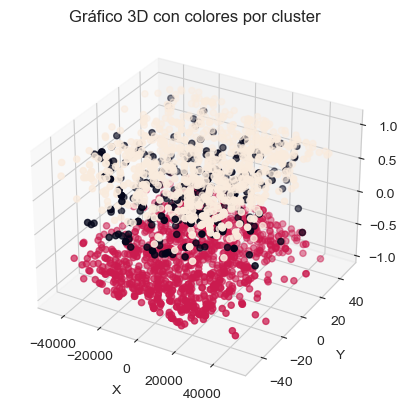

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ejemplo de datos
x = componentes[:, 0]
y = componentes[:, 1]
z = componentes[:, 2]
labels = clusters

# Crear la figura y el subplot en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Agregar los puntos al gráfico con colores diferentes para cada cluster
ax.scatter(x, y, z, c=labels)

# Ajustar las etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar el gráfico
plt.title("Gráfico 3D con colores por cluster")
plt.show()



In [40]:
import plotly.express as px
import pandas as pd

# Ejemplo de datos
data = pd.DataFrame({
    "x": componentes[:, 0],
    "y": componentes[:, 1],
    "z": componentes[:, 2],
    "label": clusters
})

# Crear el gráfico 3D
fig = px.scatter_3d(data, x='x', y='y', z='z', labels='label')

# Mostrar el gráfico
fig.show()


In [41]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Age_Group              0
dtype: int64

In [42]:
# Solo hay 24 valores nulos en Income así que los eliminamos 
df = df.dropna().reset_index(drop=True)

In [43]:
from datetime import datetime
# Creamos una columna de edad que es mejor que Year Birth
df["Age"] = df["Year_Birth"].apply(lambda x : datetime.now().year - x)
df["Age"].describe()

count    2203.000000
mean       55.195188
std        11.989173
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

In [44]:
# Así se distribuye la educación de los individuos
df["Education"].value_counts()

Education
Graduation    1110
PhD            475
Master         364
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [45]:
# Parece que ha habido 4 graciosos que han puesto Absurd o Yolo
df["Marital_Status"].value_counts()

Marital_Status
Married     854
Together    567
Single      469
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [46]:
df = df[~df["Marital_Status"].isin(["YOLO", "Absurd"])]
df["Marital_Status"].value_counts()

Marital_Status
Married     854
Together    567
Single      469
Divorced    230
Widow        76
Alone         3
Name: count, dtype: int64

In [47]:
df["Income"].describe()

count     2199.000000
mean     51495.884948
std      20585.548254
min       1730.000000
25%      35178.000000
50%      51250.000000
75%      68134.000000
max      98777.000000
Name: Income, dtype: float64

In [48]:
df["Kidhome"].value_counts()

Kidhome
0    1269
1     884
2      46
Name: count, dtype: int64

In [49]:
df["Teenhome"].value_counts()

Teenhome
0    1134
1    1014
2      51
Name: count, dtype: int64

In [50]:
pd.to_datetime(df["Dt_Customer"], dayfirst=True).apply(lambda x: x.year)

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2198    2013
2199    2014
2200    2014
2201    2014
2202    2012
Name: Dt_Customer, Length: 2199, dtype: int64

In [51]:
df["Recency"].describe()

count    2199.000000
mean       49.085039
std        28.931386
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [52]:
df["MntWines"].describe()

count    2199.000000
mean      305.524329
std       337.521345
min         0.000000
25%        24.000000
50%       176.000000
75%       506.000000
max      1493.000000
Name: MntWines, dtype: float64

In [53]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,67,51-70
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,70,51-70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,59,51-70
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,40,31-50
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,43,31-50


In [54]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group'],
      dtype='object')

**Distribución de la edad de los individuos (crear variable age, histograma, boxplot y describe)**

Se ha llevado a cabo un análisis exploratorio de la variable 'age', que incluye la creación de un boxplot y un histograma para entender su distribución y posibles valores atípicos. Se identificaron valores atípicos en la variable de edad, los cuales podrían ser resultado de errores o datos inusuales. Para abordar esta situación, se aplicará el método de z-score con el fin de detectar y tratar estos valores atípicos.

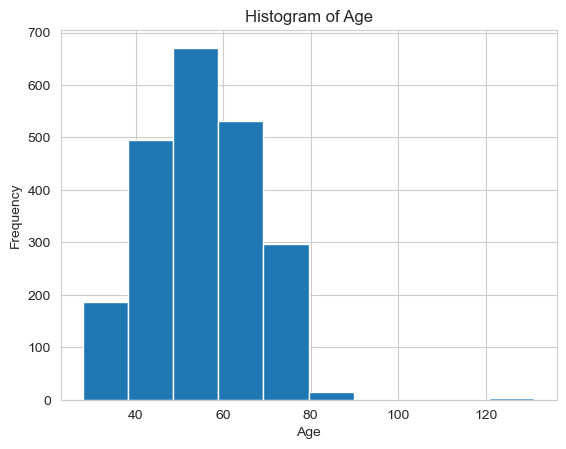

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(df['Age'])
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Age');


''

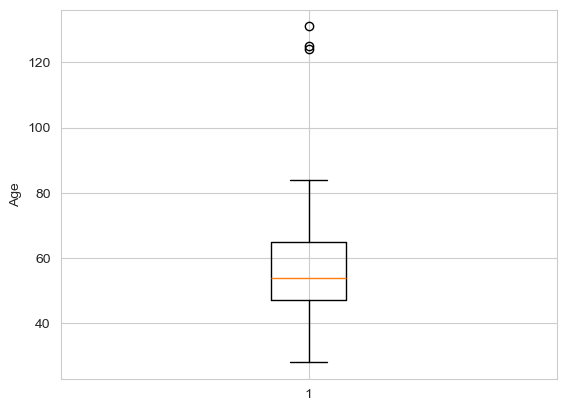

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(df["Age"])
ax.set_ylabel('Age')
;

Una vez apliicamos eñ siguiente codigo (meter en streamlit) 

In [57]:
from scipy.stats import zscore

# Calcula el z-score de la edad
age_zscore = zscore(df['Age'])

# Filtra los valores atípicos basados en el z-score
threshold = 3
df = df[(age_zscore < threshold) & (age_zscore > -threshold)]

Tras la eliminación de valores atípicos, observamos que la distribución de la edad se concentra principalmente alrededor de los 50 años, siendo este el valor más común en nuestra base de datos. La edad promedio es de aproximadamente 55 años, con un valor mínimo de 28 y un máximo de 84.

In [58]:
df['Age'].describe()

count    2196.000000
mean       55.107013
std        11.698292
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: Age, dtype: float64

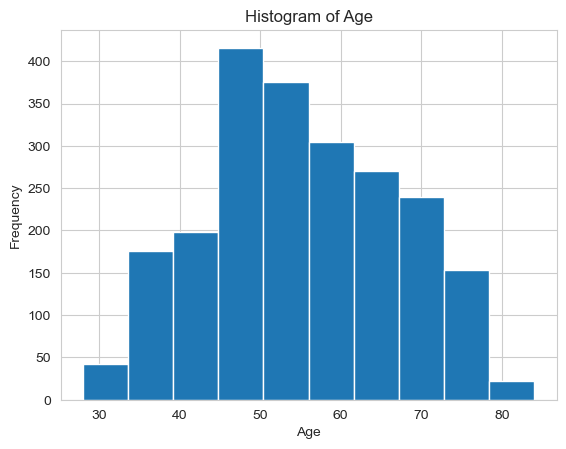

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(df['Age'])
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Age');

In [60]:
df['Age'].max()

84

Con el propósito de categorizar a nuestros individuos en distintos grupos de edad, hemos introducido la variable 'Age group', la cual divide a nuestros individuos en 5 grupos. Para lograr esto, se ha utilizado el siguiente código:

In [61]:
age_groups = []

for age in df['Age']:
    if age <= 18:
        age_groups.append('0-18')
    elif age <= 30:
        age_groups.append('19-30')
    elif age <= 50:
        age_groups.append('31-50')
    elif age <= 70:
        age_groups.append('51-70')
    else:
        age_groups.append('71+')

df['Age_Group'] = age_groups
df[['Age', 'Age_Group']].head

<bound method NDFrame.head of       Age Age_Group
0      67     51-70
1      70     51-70
2      59     51-70
3      40     31-50
4      43     31-50
...   ...       ...
2198   57     51-70
2199   78       71+
2200   43     31-50
2201   68     51-70
2202   70     51-70

[2196 rows x 2 columns]>

Tipos de educación de los individuos y su realción con la variable edad.

En el gráfico siguiente, se destaca que el nivel de educación más común entre los individuos de nuestra muestra es el de graduado, abarcando más de la mitad de la población estudiada, seguido por doctorados y máster, y en menor medida, los de 2º ciclo y nuestra categoría minoritaria, Basic. Además, este gráfico ofrece la opción de visualizar los datos segmentados por grupos de edad, facilitando un análisis más detallado mediante un botón interactivo integrado en la visualización.

<Axes: xlabel='Education', ylabel='count'>

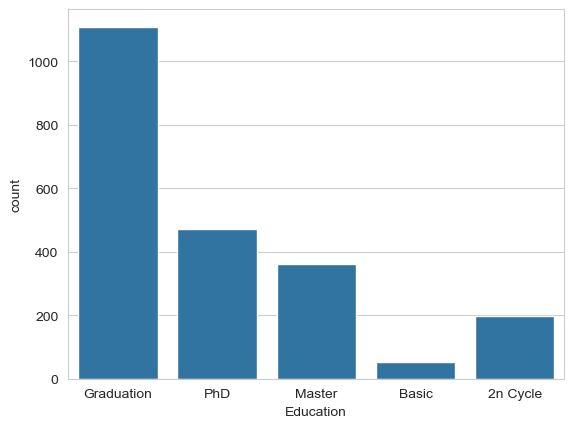

In [62]:
sns.countplot(data=df, x='Education')

<Axes: xlabel='Age_Group', ylabel='count'>

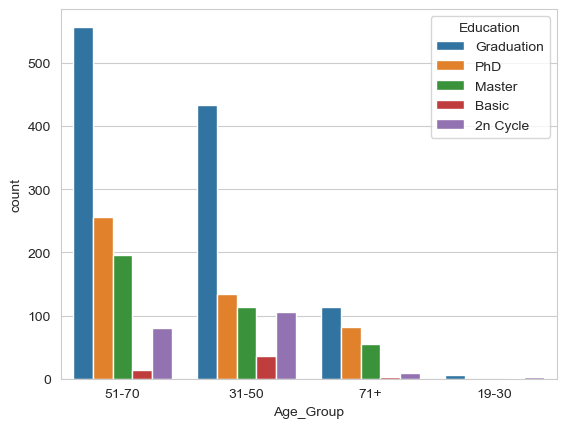

In [63]:
sns.countplot(data=df, x='Age_Group', hue='Education')

Tipos de marital status de nuestros clientes.

El recuento de la variable 'marital status' revela que la mayoría de los individuos en nuestra muestra están casados (857), seguidos por aquellos que están en pareja pero no casados (572) y los solteros (470). Además, se observa una cantidad significativa de individuos divorciados (231). Sin embargo, hay categorías menos frecuentes, como viudos (76), personas que viven solas (Alone, 3), casos clasificados como 'Absurd' (2) y 'YOLO' (2). Se ha decidido eliminar las categorías con recuentos menores a 5 por considerarse poco representativas.

In [64]:
conteo = df['Marital_Status'].value_counts()

In [65]:
conteo[conteo >5]

Marital_Status
Married     854
Together    566
Single      468
Divorced    229
Widow        76
Name: count, dtype: int64

In [66]:
conteo = df['Marital_Status'].value_counts()

# Obtener las categorías de estado civil que tienen al menos 5 observaciones
categorias_mayores_5 = conteo[conteo >= 5].index.tolist()

# Filtrar el DataFrame para incluir solo las observaciones con categorías mayores o iguales a 5
df_filtrado = df[df['Marital_Status'].isin(categorias_mayores_5)]

<Axes: xlabel='Marital_Status', ylabel='count'>

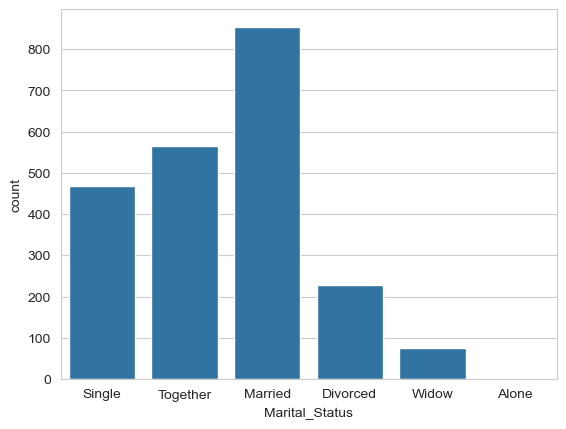

In [67]:
sns.countplot(df,x='Marital_Status')

Distribución de la renta de los clientes.

En los siguientes gráficos, se observa que la distribución de la renta se concentra principalmente en el rango de 0 a 100,000. Aunque hay algunos valores atípicos que alcanzan el valor máximo de renta de nuestros individuos, llegando a 666,666. Para obtener una mejor comprensión de la mayoría de nuestra muestra, excluiremos estos valores atípicos y presentaremos los mismos datos descriptivos.

In [68]:
zscore_income = zscore(df['Income'])
threshold=3
df = df[(zscore_income<threshold) & (zscore_income>-threshold)]


<Axes: xlabel='Income', ylabel='Count'>

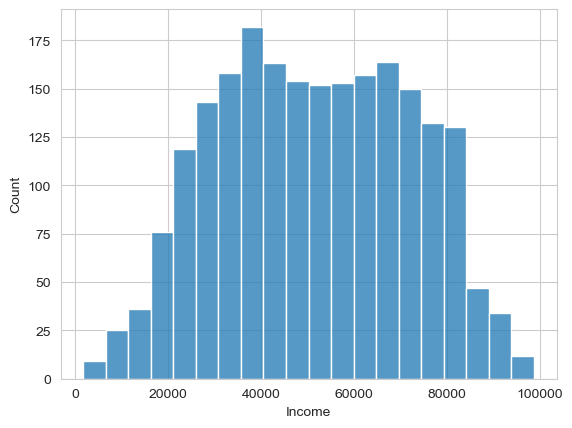

In [69]:
sns.histplot(df['Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16d00ba90>,
 'caps': [<matplotlib.lines.Line2D at 0x16d015350>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d00af10>],
 'medians': [<matplotlib.lines.Line2D at 0x16d016610>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d017110>],
 'means': []}

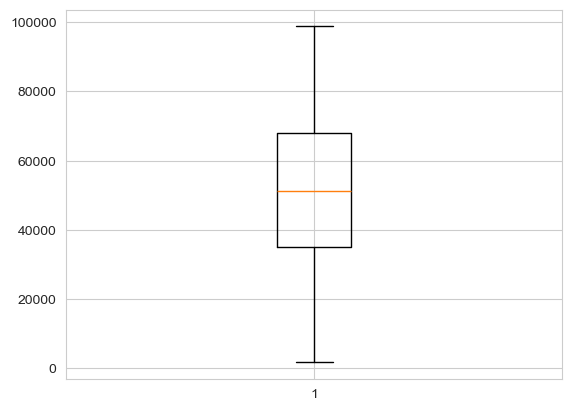

In [70]:
plt.boxplot(df['Income'])

In [71]:
df.groupby('Education').agg({'Income':'mean'})

,Income
Education,
2n Cycle,47625.333333
Basic,20306.259259
Graduation,51820.400361
Master,52594.159780
PhD,55025.930085


In [72]:
df.groupby('Marital_Status').agg({'Income':'mean'})

,Income
Marital_Status,
Alone,43789.000000
Divorced,52245.786026
Married,51350.511710
Single,50732.743590
Together,51368.526502
Widow,56481.552632


In [73]:
df['Income'].describe()

count     2196.000000
mean     51484.106102
std      20584.978715
min       1730.000000
25%      35129.500000
50%      51222.500000
75%      68130.000000
max      98777.000000
Name: Income, dtype: float64

<Axes: xlabel='Kidhome', ylabel='count'>

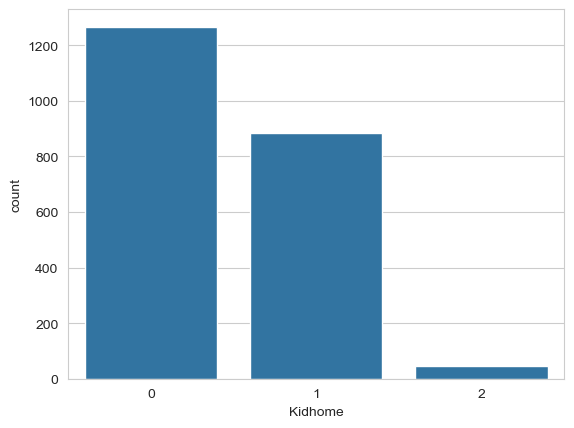

In [74]:
sns.countplot(df, x ='Kidhome')

Distribución de niños y adolescentes. El siguiente gráfico nos permite visualizar la distribución de niños o adolescentes según la opción seleccionada en la parte superior del gráfico.

In [75]:
df['Dt_Customer'].dt.year.value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Convertir la columna 'Dt_Customer' al tipo de dato datetime especificando el formato
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Aplicar la función lambda para calcular la antigüedad en la empresa
df["Antiguedad_empresa"] = df["Dt_Customer"].apply(lambda x: datetime.now().year - x.year)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_22520\1307483730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
C:\Users\Lucas\AppData\Local\Temp\ipykernel_22520\1307483730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Antiguedad_empresa"] = df["Dt_Customer"].apply(lambda x: datetime.now().year - x.year)


In [ ]:
df['Antiguedad_empresa'].describe()

count    2205.000000
mean       10.972336
std         0.686039
min        10.000000
25%        11.000000
50%        11.000000
75%        11.000000
max        12.000000
Name: Antiguedad_empresa, dtype: float64

(array([ 550.,    0.,    0.,    0.,    0., 1166.,    0.,    0.,    0.,
         489.]),
 array([10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. ]),
 <BarContainer object of 10 artists>)

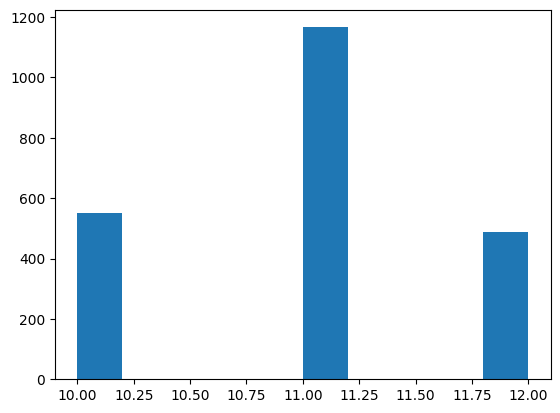

In [ ]:
plt.hist(df['Antiguedad_empresa'])

**Recency**

In [ ]:
df['Recency'].describe()

count    2205.000000
mean       49.009070
std        28.932111
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Complain

In [ ]:
df['Complain'].value_counts()

Complain
0    2185
1      20
Name: count, dtype: int64

Products

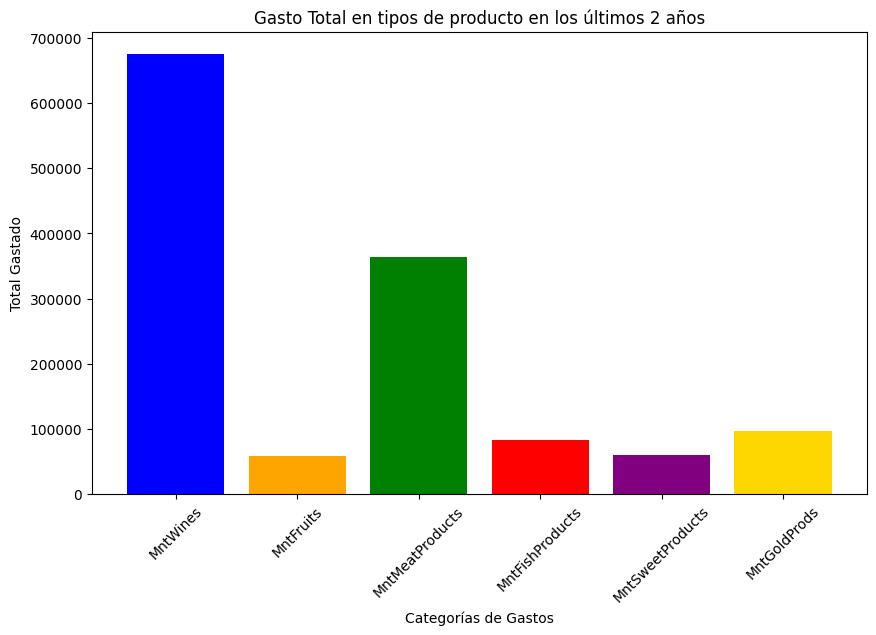

In [ ]:
# Variables a resumir
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Suma de gastos por cada variable
suma_gastos = df[variables].sum()

# Crear el gráfico de barras apilado
plt.figure(figsize=(10, 6))
plt.bar(suma_gastos.index, suma_gastos, color=['blue', 'orange', 'green', 'red', 'purple', 'gold'])
plt.xlabel('Categorías de Gastos')
plt.ylabel('Total Gastado')
plt.title('Gasto Total en tipos de producto en los últimos 2 años')
plt.xticks(rotation=45)
plt.show()

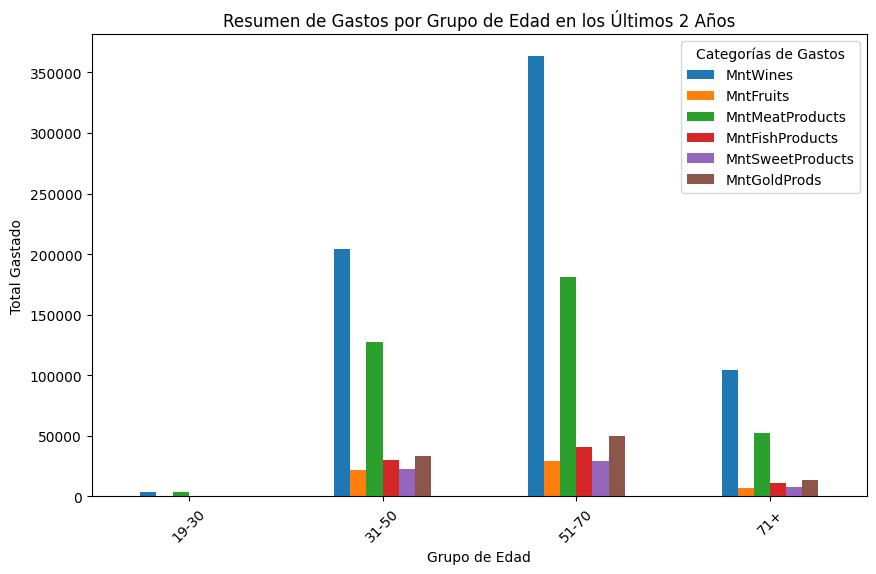

In [ ]:
# Variables a resumir
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Agrupar por grupo de edad y calcular la suma de gastos para cada variable
gastos_por_edad = df.groupby('Age_Group')[variables].sum()

# Crear el gráfico de barras agrupado
gastos_por_edad.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Grupo de Edad')
plt.ylabel('Total Gastado')
plt.title('Resumen de Gastos por Grupo de Edad en los Últimos 2 Años')
plt.xticks(rotation=45)
plt.legend(title='Categorías de Gastos')
plt.show()

PLace

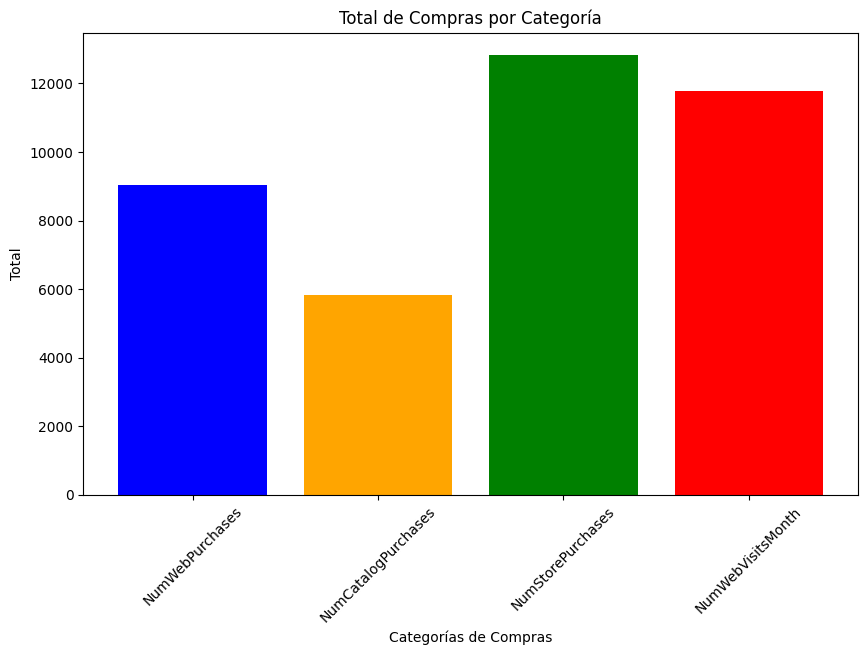

In [ ]:
import matplotlib.pyplot as plt

# Obtener la suma de cada variable
suma_compras = df[variables].sum()

# Crear el gráfico de barras apilado
plt.figure(figsize=(10, 6))
plt.bar(suma_compras.index, suma_compras, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Categorías de Compras')
plt.ylabel('Total')
plt.title('Total de Compras por Categoría')
plt.xticks(rotation=45)
plt.show()

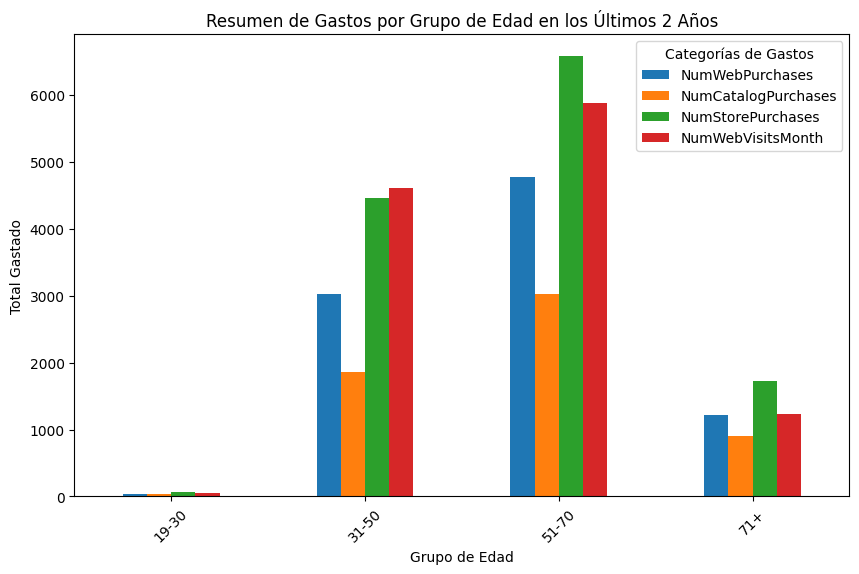

In [ ]:
# Variables a resumir
variables = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Agrupar por grupo de edad y calcular la suma de gastos para cada variable
gastos_por_edad = df.groupby('Age_Group')[variables].sum()

# Crear el gráfico de barras agrupado
gastos_por_edad.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Grupo de Edad')
plt.ylabel('Total Gastado')
plt.title('Resumen de Gastos por Grupo de Edad en los Últimos 2 Años')
plt.xticks(rotation=45)
plt.legend(title='Categorías de Gastos')
plt.show()

In [ ]:
df.to_csv('dataset_marketing_limpio.csv')

In [ ]:
df = pd.read_csv('dataset_marketing_limpio.csv')

In [ ]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,0,0,0,0,0,3,11,1,67,51-70
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,0,0,0,0,0,3,11,0,70,51-70
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,0,0,0,0,0,3,11,0,59,51-70
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,0,0,0,0,3,11,0,40,31-50
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,0,0,0,0,0,3,11,0,43,31-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,0,0,0,0,0,3,11,0,57,51-70
2197,2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,0,0,1,0,0,3,11,0,78,71+
2198,2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,1,0,0,0,0,3,11,0,43,31-50
2199,2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,0,0,0,0,0,3,11,0,68,51-70
